### Pearson Correlation Coefficient (PCC)

In [4]:
import sys
sys.path.append('/home/cwzhang/project/mrc_gan')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_pcc

In [5]:
# Calculate PCC: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

mode = 'e2pdb2mrc'

for i in range(len(pdb_list)):
    
    try:
        pdb = pdb_list[i]
        emd = emd_list[i]
        m1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map'
        m2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'

        with mrcfile.open(m1, mode='r') as mrc1, mrcfile.open(m2, mode='r') as mrc2:
            density_map1 = mrc1.data
            density_map2 = mrc2.data

        # Calculate PCC
        pcc = calculate_pcc(density_map1, density_map2, percentile=90)
        
        print(f"PCC between {mode} and experimental maps PDB-{pdb}: {pcc}")
        
        break
    
        df_csv.loc[i, f'PCC_{mode}'] = pcc
        df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)  
        
        
    except Exception as e:
        print(f"Error: {e}")
        continue


PCC between e2pdb2mrc and experimental maps PDB-2y9j: 0.5061463713645935


### Cosine Similarity (Correlation)

In [7]:
import sys
sys.path.append('/home/cwzhang/project/mrc_gan')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_cosine

In [9]:
# Calculate PCC: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

mode='molmap'

for i in range(len(pdb_list)):
    
    try:
        pdb = pdb_list[i]
        emd = emd_list[i]
        map1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map' # as reference
        map2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'
        
        correlation, correlation_about_mean = calculate_cosine(map1, map2)
        
        print(f"Correlation between {mode} and experimental maps PDB-{pdb}: {correlation}, {correlation_about_mean}")
        
        break
        
        df_csv.loc[i, f'Correlation_{mode}'] = correlation
        df_csv.loc[i, f'Correlation_About_Mean_{mode}'] = correlation_about_mean
        df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)  
        
    except Exception as e:
        print(f"Error: {e}")
        continue

Correlation between molmap and experimental maps PDB-2y9j: 0.5063, 0.1671


### SSIM

In [12]:
import sys
sys.path.append('/home/cwzhang/project/mrc_gan')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_ssim

In [13]:
# Calculate SSIM: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

mode = 'e2pdb2mrc'

for i in range(len(pdb_list)):
    
    pdb = pdb_list[i]
    emd = emd_list[i]
    # experimental map
    m1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map'
    m2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'
    

    with mrcfile.open(m1, mode='r') as mrc1, mrcfile.open(m2, mode='r') as mrc2:        
        density_map1 = mrc1.data
        density_map2 = mrc2.data
        
    # Calculate SSIM
    ssim = calculate_ssim(density_map1, density_map2)
    
    print(f"SSIM between {mode} and experimental maps PDB-{pdb}: {ssim}")

    
    break

    # df_csv.loc[i, 'SSIM_molmap'] = ssim_sim
    # df_csv.loc[i, 'SSIM_gan'] = ssim_gan
    # df_csv.to_csv('./paper_benchmark/inference_data.csv', index=False)
    

SSIM between e2pdb2mrc and experimental maps PDB-2y9j: 0.9481975327470189


### Load Data

In [14]:
# plots for PCC and SSIM
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_pdb2vol': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_pdb2vol': float, 'SSIM_molmap': float})
pdb_list = df_csv['PDBID'].to_numpy()
emd_list = df_csv['EMID'].to_numpy()
resolution_list = df_csv['Resolution'].to_numpy()
inference_time_list = df_csv['Inference-Time (s)'].to_numpy()

df = pd.DataFrame({
    'PDB': df_csv['PDBID'],
    'EMDB': df_csv['EMID'],
    'Resolution': df_csv['Resolution'],
    'Inference time (s)': df_csv['Inference-Time (s)'],
    'PCC-GAN': df_csv['PCC_gan'],
    'PCC-pdb2vol': df_csv['PCC_pdb2vol'],
    'PCC-molmap': df_csv['PCC_molmap'],
    'PCC-e2pdb2mrc': df_csv['PCC_e2pdb2mrc'],
    'SSIM-GAN': df_csv['SSIM_gan'],
    'SSIM-pdb2vol': df_csv['SSIM_pdb2vol'],
    'SSIM-molmap': df_csv['SSIM_molmap'],
    'SSIM-e2pdb2mrc': df_csv['SSIM_e2pdb2mrc'],
    'Correlation-GAN': df_csv['Correlation_gan'],
    'Correlation-pdb2vol': df_csv['Correlation_pdb2vol'],
    'Correlation-molmap': df_csv['Correlation_molmap'],
    'Correlation-e2pdb2mrc': df_csv['Correlation_e2pdb2mrc'],
    'Correlation_Average-GAN': df_csv['Correlation_About_Mean_gan'],
    'Correlation_Average-pdb2vol': df_csv['Correlation_About_Mean_pdb2vol'],
    'Correlation_Average-molmap': df_csv['Correlation_About_Mean_molmap'],
    'Correlation_Average-e2pdb2mrc': df_csv['Correlation_About_Mean_e2pdb2mrc'],
    # Ablation
    'PCC-GAN-Ablation': df_csv['PCC_gan_ablation'],
    'SSIM-GAN-Ablation': df_csv['SSIM_gan_ablation'],
    'Correlation-GAN-Ablation': df_csv['Correlation_gan_ablation'],
    'Correlation_Average-GAN-Ablation': df_csv['Correlation_About_Mean_gan_ablation'],
    })

df.head()

,PDB,EMDB,Resolution,Inference time (s),PCC-GAN,PCC-pdb2vol,PCC-molmap,PCC-e2pdb2mrc,SSIM-GAN,SSIM-pdb2vol,...,Correlation-molmap,Correlation-e2pdb2mrc,Correlation_Average-GAN,Correlation_Average-pdb2vol,Correlation_Average-molmap,Correlation_Average-e2pdb2mrc,PCC-GAN-Ablation,SSIM-GAN-Ablation,Correlation-GAN-Ablation,Correlation_Average-GAN-Ablation
0,2y9j,1874,6.4,26.645612,0.695094,0.471893,0.440930,0.506146,0.959793,0.847687,...,0.5063,0.6111,0.30890,0.17640,0.16710,0.189100,0.500377,0.924563,0.9624,0.168700
1,3ixv,5100,6.8,25.043803,0.352009,0.243729,0.225465,0.258869,0.922067,0.759728,...,0.3725,0.4531,0.06972,0.06417,0.06157,0.072140,0.173393,0.860460,0.7793,0.030550
2,3iyj,5155,4.2,23.097357,0.280463,0.204070,0.213002,0.063716,0.860114,0.739714,...,0.2638,0.0822,0.03824,0.06098,0.06423,0.008641,0.167568,0.838218,0.7052,0.022740
3,3izi,5245,6.7,22.304340,0.671848,0.468394,0.435717,0.496131,0.864755,0.830591,...,0.5592,0.6516,0.10040,0.04855,0.04050,0.043920,0.446506,0.764754,0.9773,-0.042470
4,3j9t,6284,6.9,28.570023,0.624895,0.389376,0.389354,0.397358,0.744860,0.722073,...,0.4794,0.5176,0.23670,0.16100,0.14570,0.220900,0.411245,0.694074,0.9589,-0.002461


### Benchmark study

#### Table

In [15]:
pcc_value = ['PCC-GAN', 'PCC-pdb2vol', 'PCC-molmap', 'PCC-e2pdb2mrc']
ssim_value = ['SSIM-GAN', 'SSIM-pdb2vol', 'SSIM-molmap', 'SSIM-e2pdb2mrc']

print('#### PCC Mean ####')
print(round(df[pcc_value].mean(), 3))
print()
print('#### PCC Median ####')
print(round(df[pcc_value].median(), 3))
print()
print('#### SSIM Mean ####')
print(round(df[ssim_value].mean(), 3))
print()
print('#### SSIM Median ####')
print(round(df[ssim_value].median(), 3))
print()
print('#### Correlation Mean ####')
print(round(df[['Correlation-GAN', 'Correlation-molmap', 'Correlation-pdb2vol', 'Correlation-e2pdb2mrc']].mean(), 3))
print()
print('#### Correlation Median ####')
print(round(df[['Correlation-GAN', 'Correlation-molmap', 'Correlation-pdb2vol', 'Correlation-e2pdb2mrc']].median(), 3))
print()
print('#### Correlation_Average Mean ####')
print(round(df[['Correlation_Average-GAN', 'Correlation_Average-molmap', 'Correlation_Average-pdb2vol', 'Correlation_Average-e2pdb2mrc']].mean(), 3))
print()
print('#### Correlation_Average Median ####')
print(round(df[['Correlation_Average-GAN', 'Correlation_Average-molmap', 'Correlation_Average-pdb2vol', 'Correlation_Average-e2pdb2mrc']].median(), 3))


#### PCC Mean ####
PCC-GAN          0.594
PCC-pdb2vol      0.475
PCC-molmap       0.452
PCC-e2pdb2mrc    0.251
dtype: float64

#### PCC Median ####
PCC-GAN          0.621
PCC-pdb2vol      0.499
PCC-molmap       0.470
PCC-e2pdb2mrc    0.237
dtype: float64

#### SSIM Mean ####
SSIM-GAN          0.841
SSIM-pdb2vol      0.764
SSIM-molmap       0.771
SSIM-e2pdb2mrc    0.842
dtype: float64

#### SSIM Median ####
SSIM-GAN          0.896
SSIM-pdb2vol      0.771
SSIM-molmap       0.774
SSIM-e2pdb2mrc    0.895
dtype: float64

#### Correlation Mean ####
Correlation-GAN          0.906
Correlation-molmap       0.559
Correlation-pdb2vol      0.603
Correlation-e2pdb2mrc    0.322
dtype: float64

#### Correlation Median ####
Correlation-GAN          0.943
Correlation-molmap       0.573
Correlation-pdb2vol      0.620
Correlation-e2pdb2mrc    0.312
dtype: float64

#### Correlation_Average Mean ####
Correlation_Average-GAN          0.466
Correlation_Average-molmap       0.315
Correlation_Average-pdb2vol  

#### Violin plot

In [ ]:
# # Make DataFrame for PCC and SSIM
# df_pcc = pd.melt(df, 
#                  value_vars=['PCC-GAN', 'PCC-pdb2vol', 'PCC-molmap', 'PCC-e2pdb2mrc'], 
#                  var_name='Method', 
#                  value_name='Pearson Correlation'
#                  )


# df_ssim = pd.melt(df,
#                   value_vars=['SSIM-GAN', 'SSIM-pdb2vol', 'SSIM-molmap', 'SSIM-e2pdb2mrc'],
#                   var_name='Method',
#                   value_name='SSIM'
#                   )

# # sort the df based on 'Resolution'
# df_sorted = df.sort_values('Resolution')

# # make subplots
# fig, axs = plt.subplots(1,2, figsize=(25, 10))

# # Set font size
# fontsize = 25  # Size for titles/labels/ticks

# '''
# PCC violin plot
# '''
# sns.violinplot(
#     x='Method', 
#     y='Pearson Correlation', 
#     data=df_pcc,
#     hue='Method',
#     inner='box',
#     inner_kws=dict(box_width=10, whis_width=1.5, color=".0"),
#     linewidth=1,
#     ax=axs[0],
#     )

# # axs[0,0].set_title('Comparison of Pearson Correlations', fontsize=fontsize)
# axs[0].tick_params(labelsize=18) # change the font size of the ticks
# axs[0].set_xticks([0, 1, 2, 3], ['GAN', 'pdb2vol', 'molmap', 'e2pdb2mrc'], fontsize=fontsize) # change the x-axis labels
# axs[0].set_xlabel('') # no x label
# axs[0].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)


# '''
# SSIM violin plot
# '''
# sns.violinplot(
#     x='Method', 
#     y='SSIM', 
#     data=df_ssim,
#     hue='Method',
#     inner='box',
#     inner_kws=dict(box_width=10, whis_width=1.5, color=".0"),
#     linewidth=1,
#     ax=axs[1],
#     )
# axs[1].tick_params(labelsize=18) # change the font size of the ticks
# axs[1].set_xticks([0, 1, 2, 3], ['GAN', 'pdb2vol', 'molmap', 'e2pdb2mrc'], fontsize=fontsize) # change the x-axis labels
# axs[1].set_xlabel('') # no x label
# axs[1].set_ylabel('Structural Similarity (SSIM)', fontsize=fontsize)


# plt.show()

#### Box plot

In [22]:
# Make DataFrame for PCC and SSIM
df_pcc = pd.melt(df, 
                 value_vars=['PCC-GAN', 'PCC-pdb2vol', 'PCC-molmap', 'PCC-e2pdb2mrc'], 
                 var_name='Method', 
                 value_name='Pearson Correlation'
                 )
df_ssim = pd.melt(df,
                  value_vars=['SSIM-GAN', 'SSIM-pdb2vol', 'SSIM-molmap', 'SSIM-e2pdb2mrc'],
                  var_name='Method',
                  value_name='SSIM'
                  )
df_corr = pd.melt(df,
                    value_vars=['Correlation-GAN', 'Correlation-pdb2vol', 'Correlation-molmap', 'Correlation-e2pdb2mrc'],
                    var_name='Method',
                    value_name='Correlation'
                    )
df_corr_about_mean = pd.melt(df,
                    value_vars=['Correlation_Average-GAN', 'Correlation_Average-pdb2vol', 'Correlation_Average-molmap', 'Correlation_Average-e2pdb2mrc'],
                    var_name='Method',
                    value_name='Correlation_About_Mean'
                    )

/tmp/ipykernel_144574/2071862687.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_144574/2071862687.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis


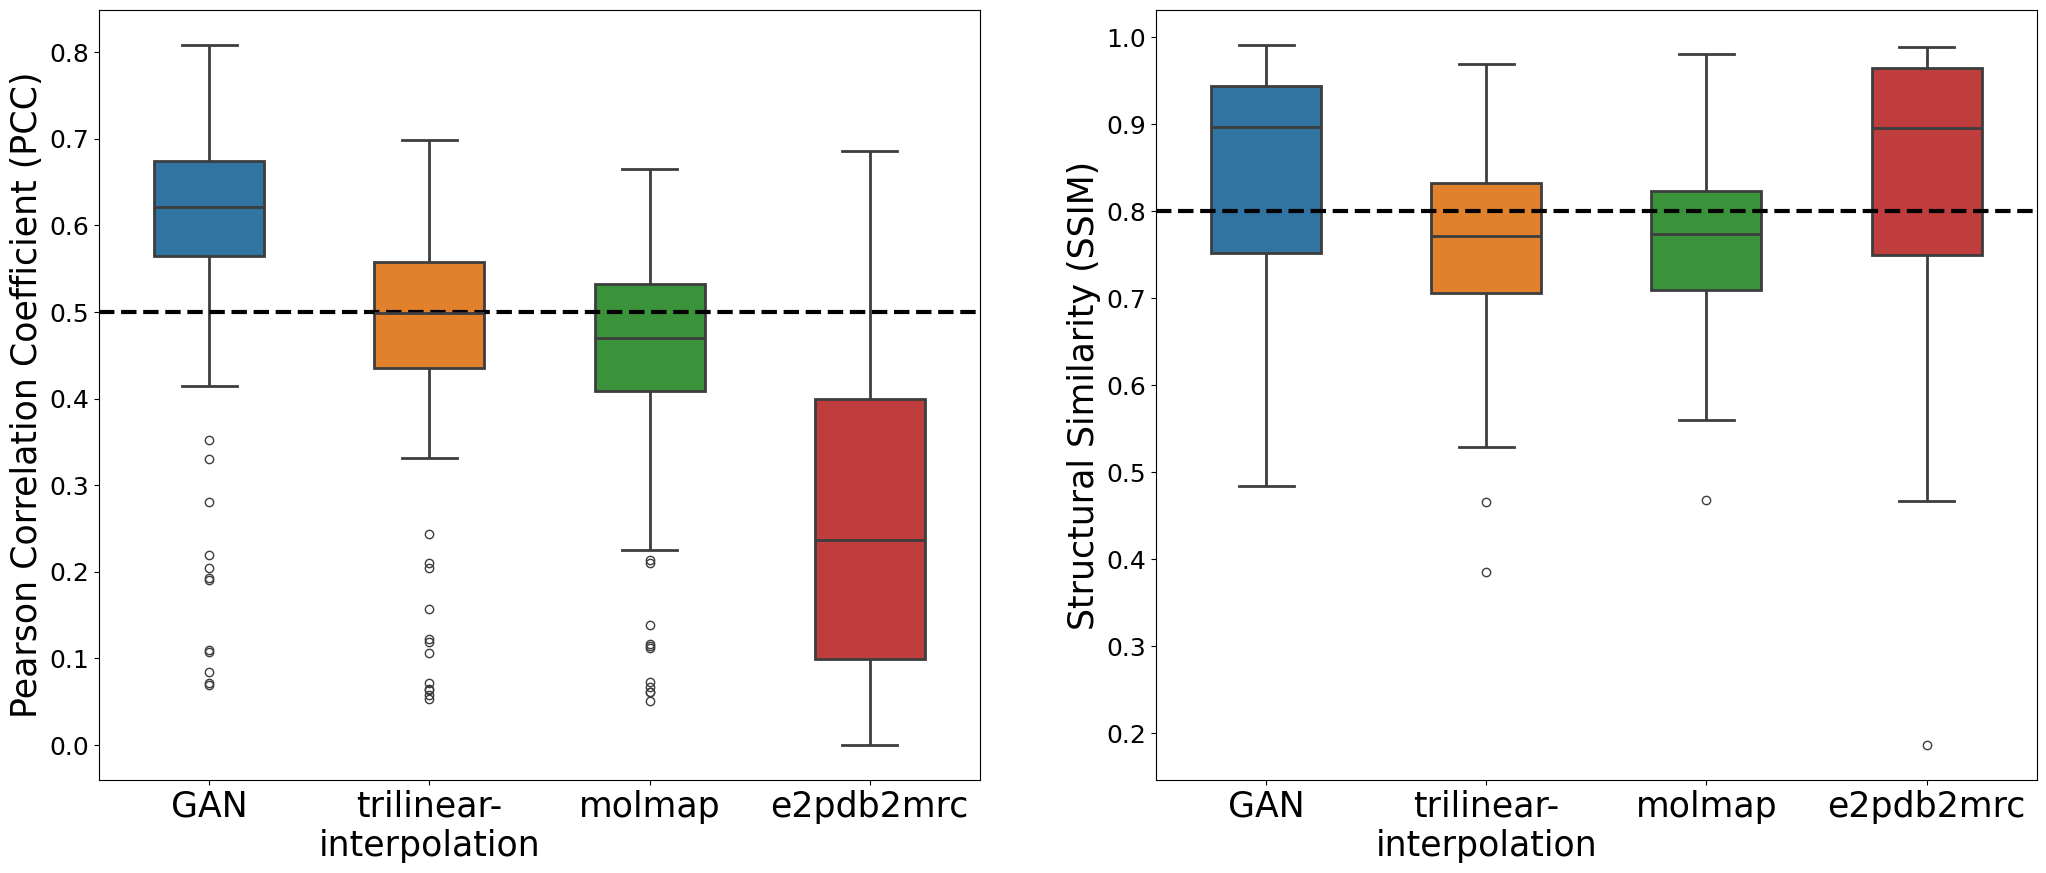

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pcc and df_ssim are your DataFrame variables for PCC and SSIM data respectively.

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Set font size
fontsize = 25  # Size for titles/labels/ticks

'''
PCC Box plot
'''
sns.boxplot(
    x='Method',
    y='Pearson Correlation',
    data=df_pcc,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0]
)

axs[0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0].set_xlabel('')  # No x-label
axs[0].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)
# plot y=0.5
axs[0].axhline(y=0.5, color='k', linestyle='--', linewidth=3)

'''
SSIM Box plot
'''
sns.boxplot(
    x='Method',
    y='SSIM',
    data=df_ssim,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1]
)

axs[1].tick_params(labelsize=18) # Change the font size of the ticks
axs[1].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[1].set_xlabel('')  # No x-label
axs[1].set_ylabel('Structural Similarity (SSIM)', fontsize=fontsize)
# plot y=0.5
axs[1].axhline(y=0.8, color='k', linestyle='--', linewidth=3)


plt.show()


/tmp/ipykernel_144574/765113306.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_144574/765113306.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_144574/765113306.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_144574/765113306.py:87: UserWarning: set_ticklabels() s

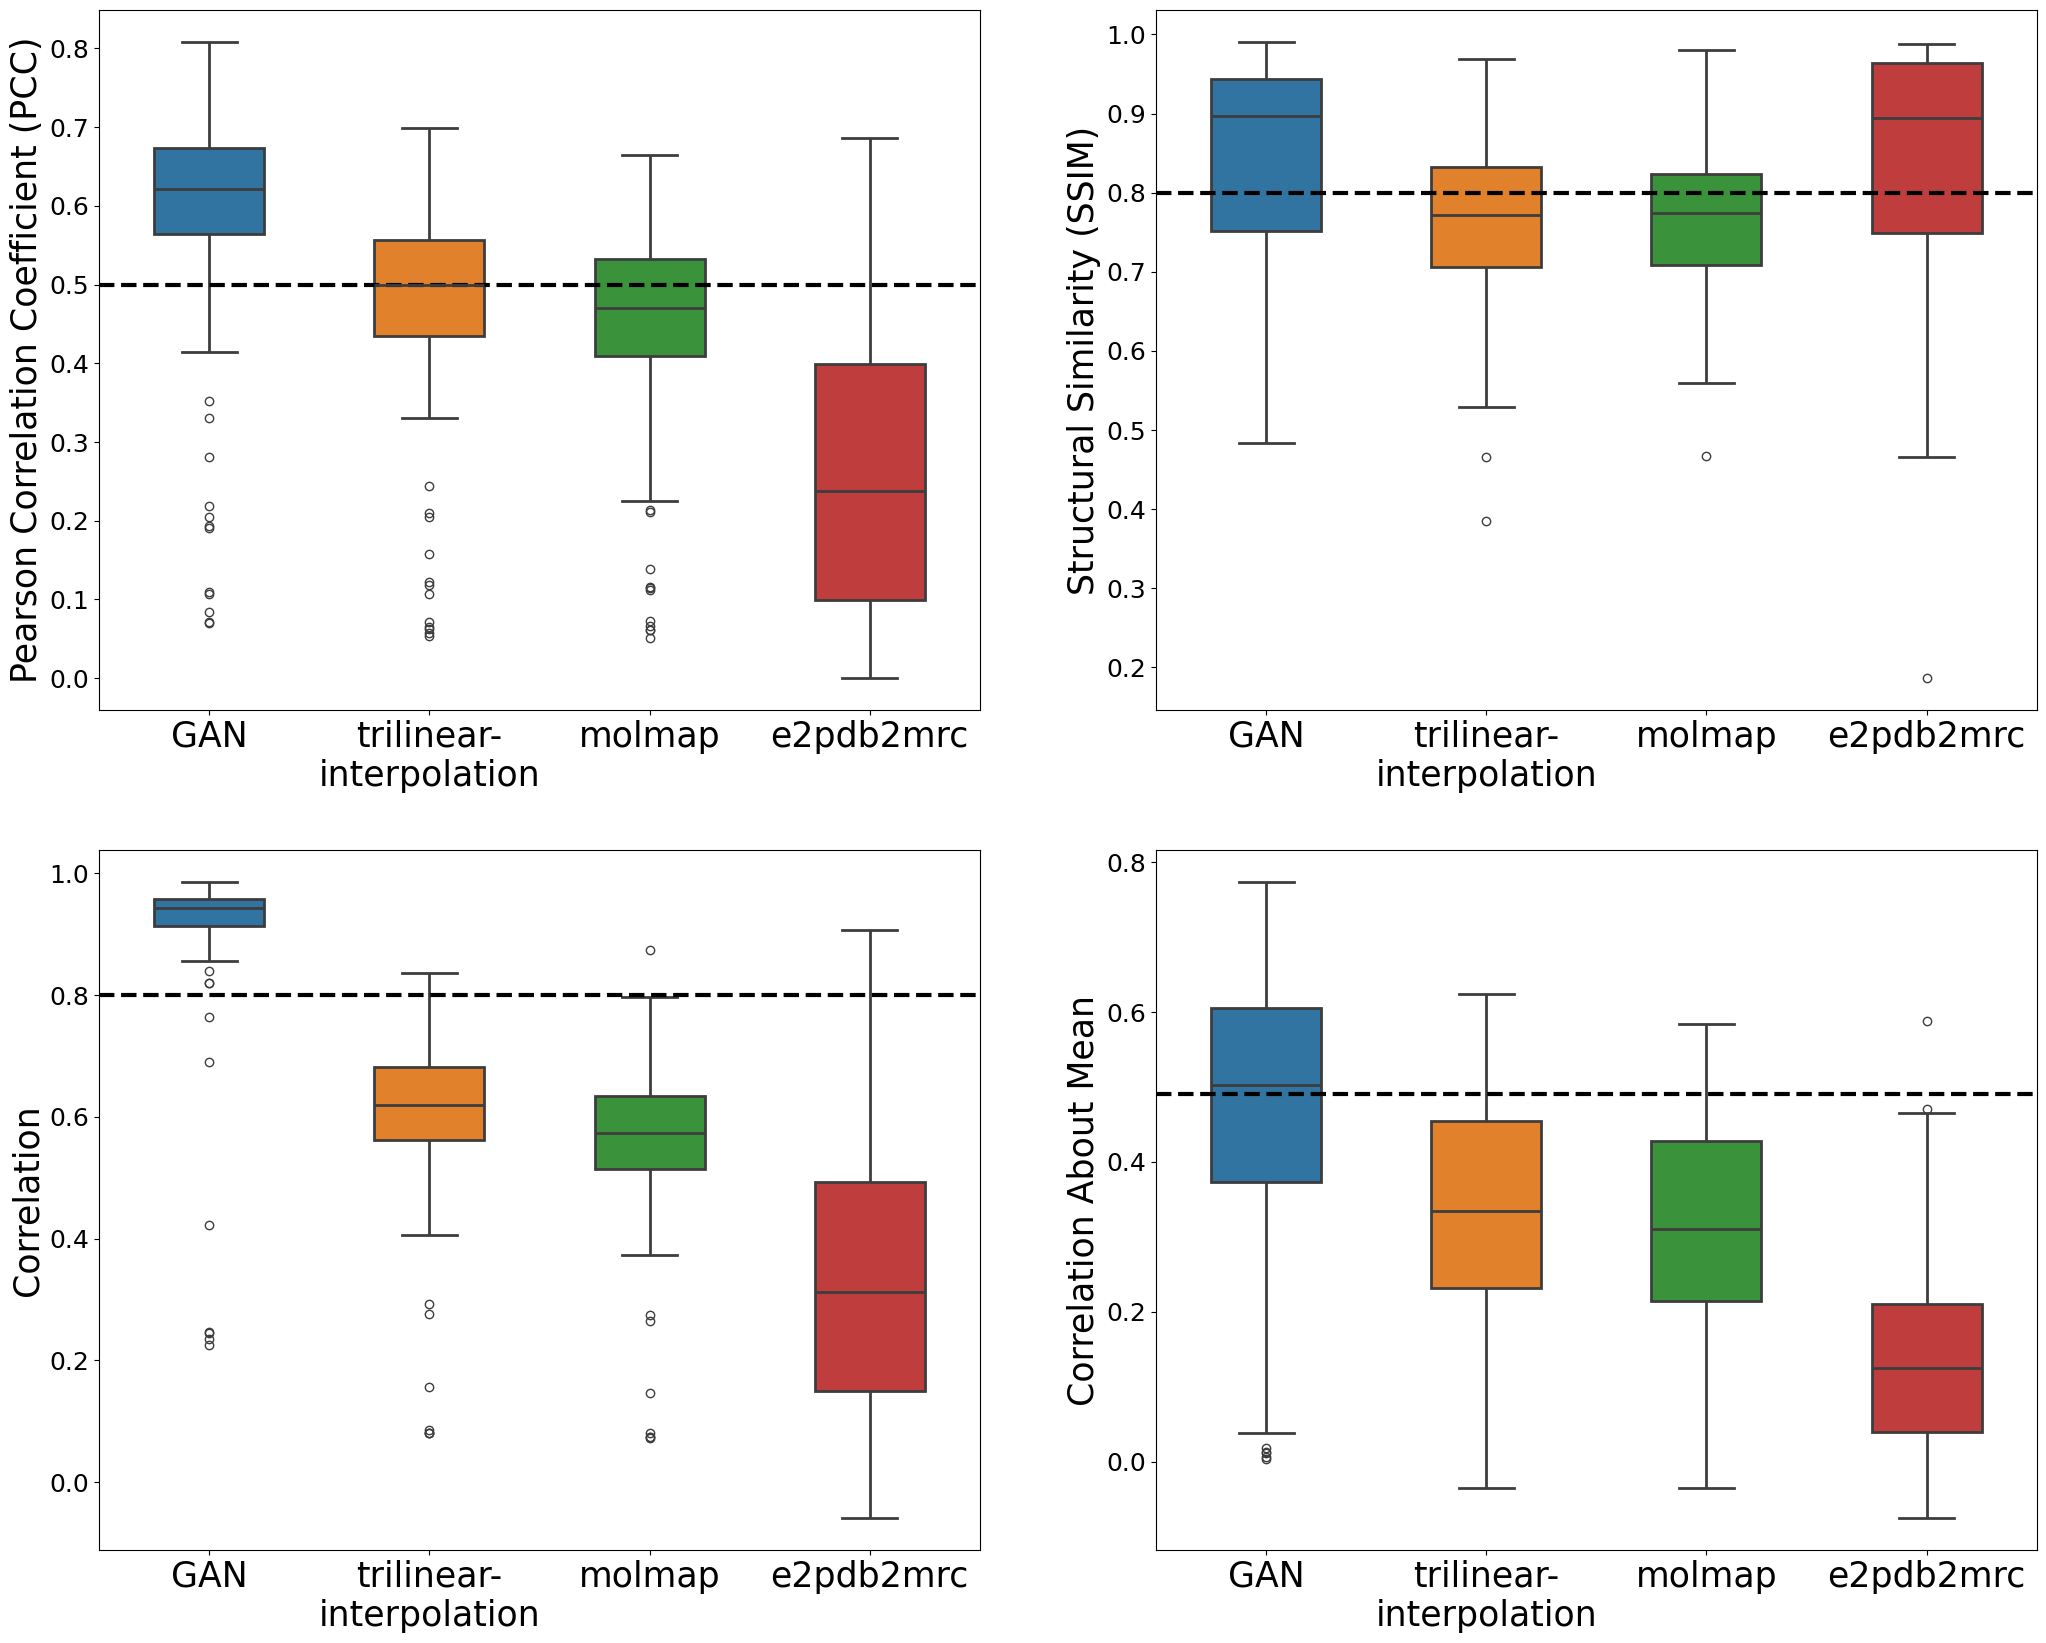

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pcc and df_ssim are your DataFrame variables for PCC and SSIM data respectively.

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 20))

# Set font size
fontsize = 25  # Size for titles/labels/ticks

'''
PCC Box plot
'''
sns.boxplot(
    x='Method',
    y='Pearson Correlation',
    data=df_pcc,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0,0]
)

axs[0,0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0,0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0,0].set_xlabel('')  # No x-label
axs[0,0].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)
# plot y=0.5
axs[0,0].axhline(y=0.5, color='k', linestyle='--', linewidth=3)

'''
SSIM Box plot
'''
sns.boxplot(
    x='Method',
    y='SSIM',
    data=df_ssim,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0,1]
)

axs[0,1].tick_params(labelsize=18) # Change the font size of the ticks
axs[0,1].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0,1].set_xlabel('')  # No x-label
axs[0,1].set_ylabel('Structural Similarity (SSIM)', fontsize=fontsize)
# plot y=0.5
axs[0,1].axhline(y=0.8, color='k', linestyle='--', linewidth=3)


'''
Correlation Box plot
'''
sns.boxplot(
    x='Method',
    y='Correlation',
    data=df_corr,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1,0]
)

axs[1,0].tick_params(labelsize=18) # Change the font size of the ticks
axs[1,0].set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[1,0].set_xlabel('')  # No x-label
axs[1,0].set_ylabel('Correlation', fontsize=fontsize)
# plot y=0.5
axs[1,0].axhline(y=0.8, color='k', linestyle='--', linewidth=3)

'''
Correlation About Mean Box plot
'''
sns.boxplot(
    x='Method',
    y='Correlation_About_Mean',
    data=df_corr_about_mean,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1,1]
)
ax = axs[1,1]
ax.tick_params(labelsize=18) # Change the font size of the ticks
ax.set_xticklabels(['GAN', 'trilinear-\ninterpolation', 'molmap', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
ax.set_xlabel('')  # No x-label
ax.set_ylabel('Correlation About Mean', fontsize=fontsize)
# plot y=0.5
ax.axhline(y=0.49, color='k', linestyle='--', linewidth=3)


plt.show()


#### Scatter plot

In [ ]:
# # sort the df based on 'Resolution'
# df_sorted = df.sort_values('Resolution')
# df_sorted = df # no sort

# df_pcc_scatter = pd.DataFrame(
#     {
#         'GAN': df_sorted['PCC-GAN'],
#         # 'pdb2vol': df_sorted['PCC-pdb2vol'],
#         'molmap': df_sorted['PCC-molmap'],
#         # 'e2pdb2mrc': df_sorted['PCC-e2pdb2mrc'],
#     }
# )
# # Compute the maximum value across the three methods for each element
# df_pcc_scatter['MaxValue'] = df_pcc_scatter.max(axis=1)
# # Find out which method produced the maximum value
# df_pcc_scatter['MaxMethod'] = df_pcc_scatter[['GAN', 'pdb2vol', 'molmap', 'e2pdb2mrc']].idxmax(axis=1)
# # Create a new DataFrame for plotting
# df_pcc_scatter_plot = pd.DataFrame({
#     'MapIndex': np.arange(130),  # Assuming you want to plot against an index
#     'MaxValue': df_pcc_scatter['MaxValue'],
#     'MaxMethod': df_pcc_scatter['MaxMethod']
# })


# df_ssim_scatter = pd.DataFrame(
#     {
#         'GAN': df_sorted['SSIM-GAN'],
#         'pdb2vol': df_sorted['SSIM-pdb2vol'],
#         'molmap': df_sorted['SSIM-molmap'],
#         'e2pdb2mrc': df_sorted['SSIM-e2pdb2mrc'],
#     }
# )
# df_ssim_scatter['MaxValue'] = df_ssim_scatter.max(axis=1)
# df_ssim_scatter['MaxMethod'] = df_ssim_scatter[['GAN', 'pdb2vol', 'molmap', 'e2pdb2mrc']].idxmax(axis=1)
# df_ssim_scatter_plot = pd.DataFrame({
#     'MapIndex': np.arange(130),  # Assuming you want to plot against an index
#     'MaxValue': df_ssim_scatter['MaxValue'],
#     'MaxMethod': df_ssim_scatter['MaxMethod']
# })

# df_corr_scatter = pd.DataFrame(
#     {
#         'GAN': df_sorted['Correlation-GAN'],
#         'pdb2vol': df_sorted['Correlation-pdb2vol'],
#         'molmap': df_sorted['Correlation-molmap'],
#         'e2pdb2mrc': df_sorted['Correlation-e2pdb2mrc'],
#     }
# )
# df_corr_scatter['MaxValue'] = df_corr_scatter.max(axis=1)
# df_corr_scatter['MaxMethod'] = df_corr_scatter[['GAN', 'pdb2vol', 'molmap', 'e2pdb2mrc']].idxmax(axis=1)
# df_corr_scatter_plot = pd.DataFrame({
#     'MapIndex': np.arange(130),  # Assuming you want to plot against an index
#     'MaxValue': df_corr_scatter['MaxValue'],
#     'MaxMethod': df_corr_scatter['MaxMethod']
# })



In [112]:
# sort the df based on 'Resolution'
df_sorted = df.sort_values('Resolution')
# df_sorted = df # no sort

df_ssim_scatter = pd.DataFrame(
    {
        'GAN': df_sorted['SSIM-GAN'],
        'molmap': df_sorted['SSIM-molmap'],
        'index': np.arange(130)
    }
)
df_corr_scatter = pd.DataFrame(
    {
        'GAN': df_sorted['Correlation-GAN'],
        'molmap': df_sorted['Correlation-molmap'],
        'index': np.arange(130)
    }
)
df_ssim_scatter = pd.melt(df_ssim_scatter, id_vars=['index'], value_vars=['GAN', 'molmap'], var_name='Method', value_name='SSIM')
df_corr_scatter = pd.melt(df_corr_scatter, id_vars=['index'], value_vars=['GAN', 'molmap'], var_name='Method', value_name='Correlation')

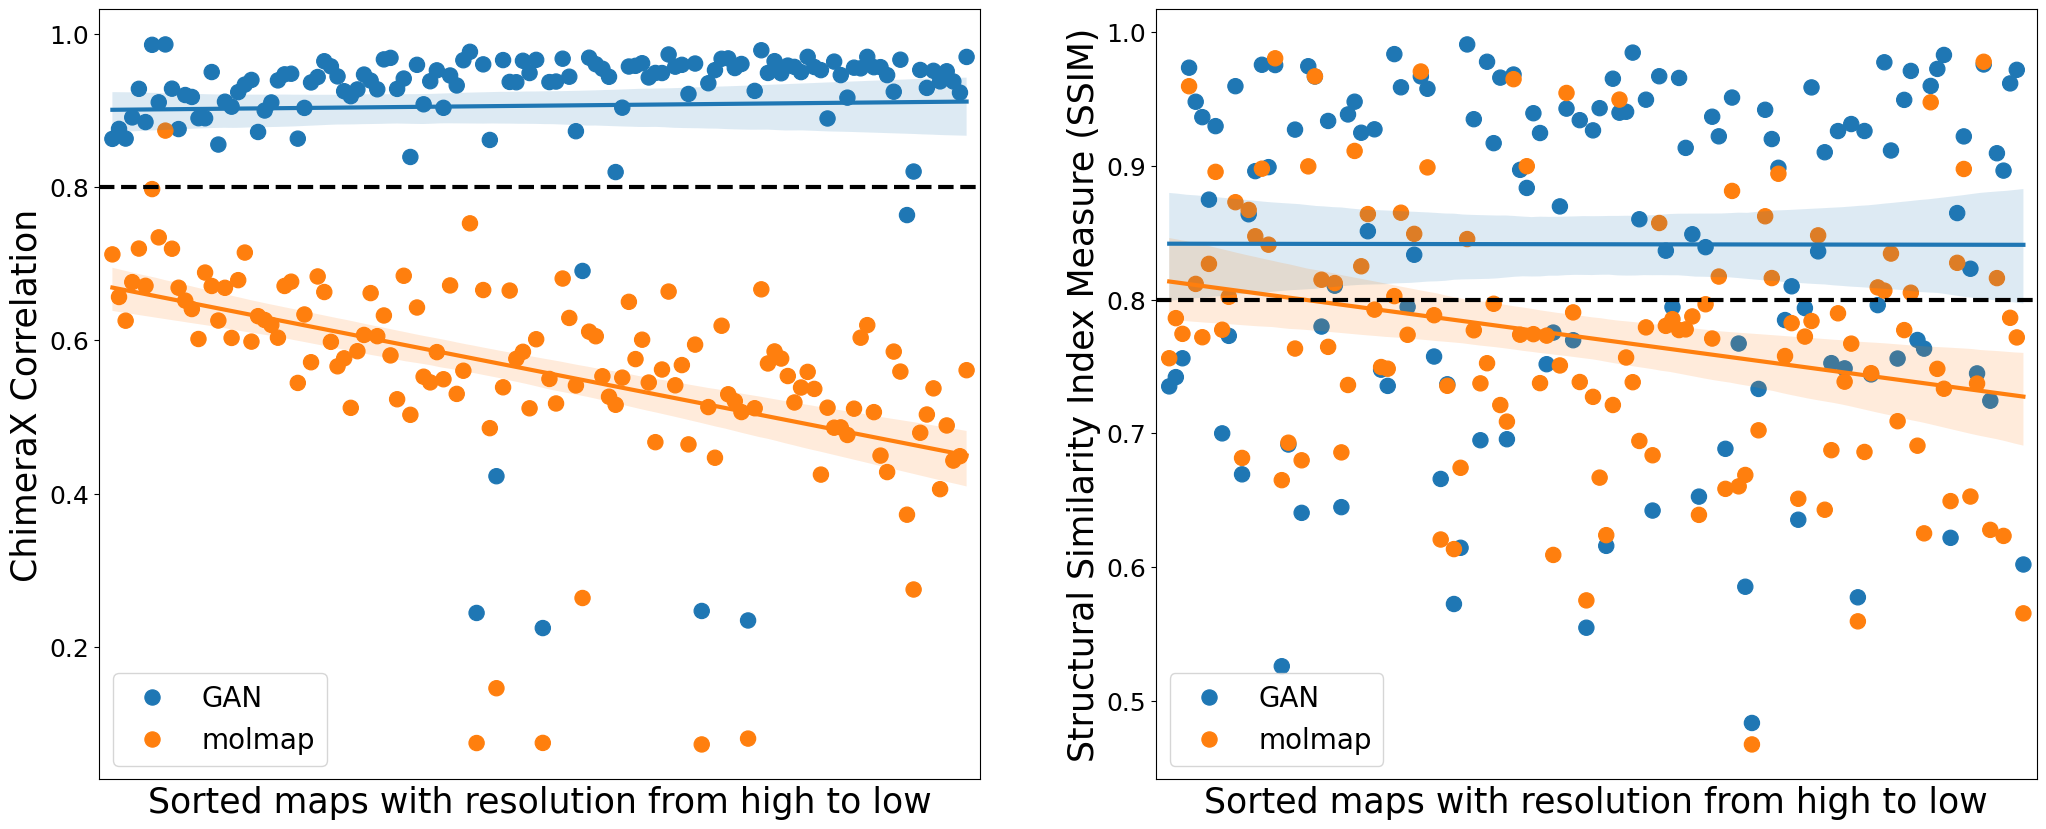

In [128]:
# plot the correlation and ssim scatter plot
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Set font size
fontsize = 25  # Size for titles/labels/ticks
markersize = 120

colors = sns.color_palette("tab10")
method_colors = {'GAN': colors[0], 'molmap': colors[1]}

    
'''
Correlation Scatter plot
'''
sns.scatterplot(
    x='index',
    y='Correlation',
    data=df_corr_scatter,
    hue='Method',
    s=markersize,
    edgecolor=None,
    ax=axs[0]    
)
# Add the regression lines
for method in ['GAN', 'molmap']:
    data = df_corr_scatter[df_corr_scatter['Method'] == method]
    sns.regplot(
        x='index',
        y='Correlation',
        data=data,
        scatter=False,
        color=method_colors[method],
        ax=axs[0],
        line_kws={'linewidth': 3}
    )
axs[0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0].set_xticks([])
axs[0].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
axs[0].set_ylabel('ChimeraX Correlation', fontsize=fontsize)
axs[0].axhline(y=0.8, color='k', linestyle='--', linewidth=3)
axs[0].legend(fontsize=20)
axs[0].set_xlim(-2, 131)


'''
SSIM Scatter plot
'''
sns.scatterplot(
    x='index',
    y='SSIM',
    data=df_ssim_scatter,
    hue='Method',
    s=markersize,
    edgecolor=None,
    ax=axs[1]
)
# Add the regression lines
for method in ['GAN', 'molmap']:
    data = df_ssim_scatter[df_ssim_scatter['Method'] == method]
    sns.regplot(
        x='index',
        y='SSIM',
        data=data,
        scatter=False,
        color=method_colors[method],
        ax=axs[1],
        line_kws={'linewidth': 3}
    )
axs[1].tick_params(labelsize=18) # Change the font size of the ticks
axs[1].set_xticks([])
axs[1].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
axs[1].set_ylabel('Structural Similarity Index Measure (SSIM)', fontsize=fontsize)
axs[1].axhline(y=0.8, color='k', linestyle='--', linewidth=3)
axs[1].legend(fontsize=20)
axs[1].set_xlim(-2, 131)
    

plt.show()

In [30]:
# sort the df based on 'Resolution'
df_sorted = df.sort_values('Resolution')
df_sorted


,PDB,EMDB,Resolution,Inference time (s),PCC-GAN,PCC-pdb2vol,PCC-molmap,PCC-e2pdb2mrc,SSIM-GAN,SSIM-pdb2vol,SSIM-molmap,SSIM-e2pdb2mrc,PCC-GAN-Ablation,SSIM-GAN-Ablation
60,6acf,9590,3.0,17.109302,0.604579,0.608855,0.581235,0.131434,0.735152,0.806624,0.756210,0.738341,0.397022,0.713974
174,6w6v,21564,3.0,32.005561,0.182144,0.114564,0.112062,0.000000,0.757191,0.790424,0.777227,0.000000,0.137002,0.751366
123,6lth,0968,3.0,29.743875,0.542613,0.661815,0.643642,0.000000,0.992882,0.930314,0.861299,0.000000,0.350286,0.987696
183,6ygi,10803,3.0,20.144531,0.075145,0.086546,0.085012,0.000000,0.731785,0.678809,0.613331,0.000000,0.057396,0.730916
193,7jpk,22414,3.0,20.828561,0.507662,0.550422,0.536934,0.005503,0.742084,0.794375,0.786178,0.000000,0.346054,0.728081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,4uqq,2685,7.6,20.002550,0.577780,0.414754,0.378255,0.000000,0.929675,0.773736,0.763768,0.000000,0.303844,0.872306
46,5vh9,8673,7.7,21.701612,0.513717,0.393348,0.376338,0.000000,0.981687,0.777120,0.764892,0.000000,0.284735,0.956822
198,5vhw,8685,7.8,24.278779,0.588745,0.441735,0.411039,0.008039,0.971839,0.880924,0.771761,0.000000,0.297732,0.954971
113,6k9k,9949,7.8,20.766436,0.621339,0.470027,0.435101,0.152358,0.961695,0.915829,0.786422,0.974356,0.331601,0.907669


### Ablation study

#### Table

In [6]:
pcc_value = ['PCC-GAN', 'PCC-GAN-Ablation']
ssim_value = ['SSIM-GAN', 'SSIM-GAN-Ablation']

print('#### PCC Mean ####')
print(round(df[pcc_value].mean(), 3))
print()
print('#### PCC Median ####')
print(round(df[pcc_value].median(), 3))
print()
print('#### SSIM Mean ####')
print(round(df[ssim_value].mean(), 3))
print()
print('#### SSIM Median ####')
print(round(df[ssim_value].median(), 3))

#### PCC Mean ####
PCC-GAN             0.594
PCC-GAN-Ablation    0.359
dtype: float64

#### PCC Median ####
PCC-GAN             0.621
PCC-GAN-Ablation    0.375
dtype: float64

#### SSIM Mean ####
SSIM-GAN             0.841
SSIM-GAN-Ablation    0.805
dtype: float64

#### SSIM Median ####
SSIM-GAN             0.896
SSIM-GAN-Ablation    0.833
dtype: float64


#### Box plot

In [7]:
# Make DataFrame for PCC and SSIM
df_pcc = pd.melt(df, 
                 value_vars=['PCC-GAN', 'PCC-GAN-Ablation'], 
                 var_name='Method', 
                 value_name='Pearson Correlation'
                 )


df_ssim = pd.melt(df,
                  value_vars=['SSIM-GAN', 'SSIM-GAN-Ablation'],
                  var_name='Method',
                  value_name='SSIM'
                  )


/tmp/ipykernel_3635124/1566141261.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['baseline', 'w/o L1'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_3635124/1566141261.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['baseline', 'w/o L1'], fontsize=fontsize)  # Set custom labels for the x-axis


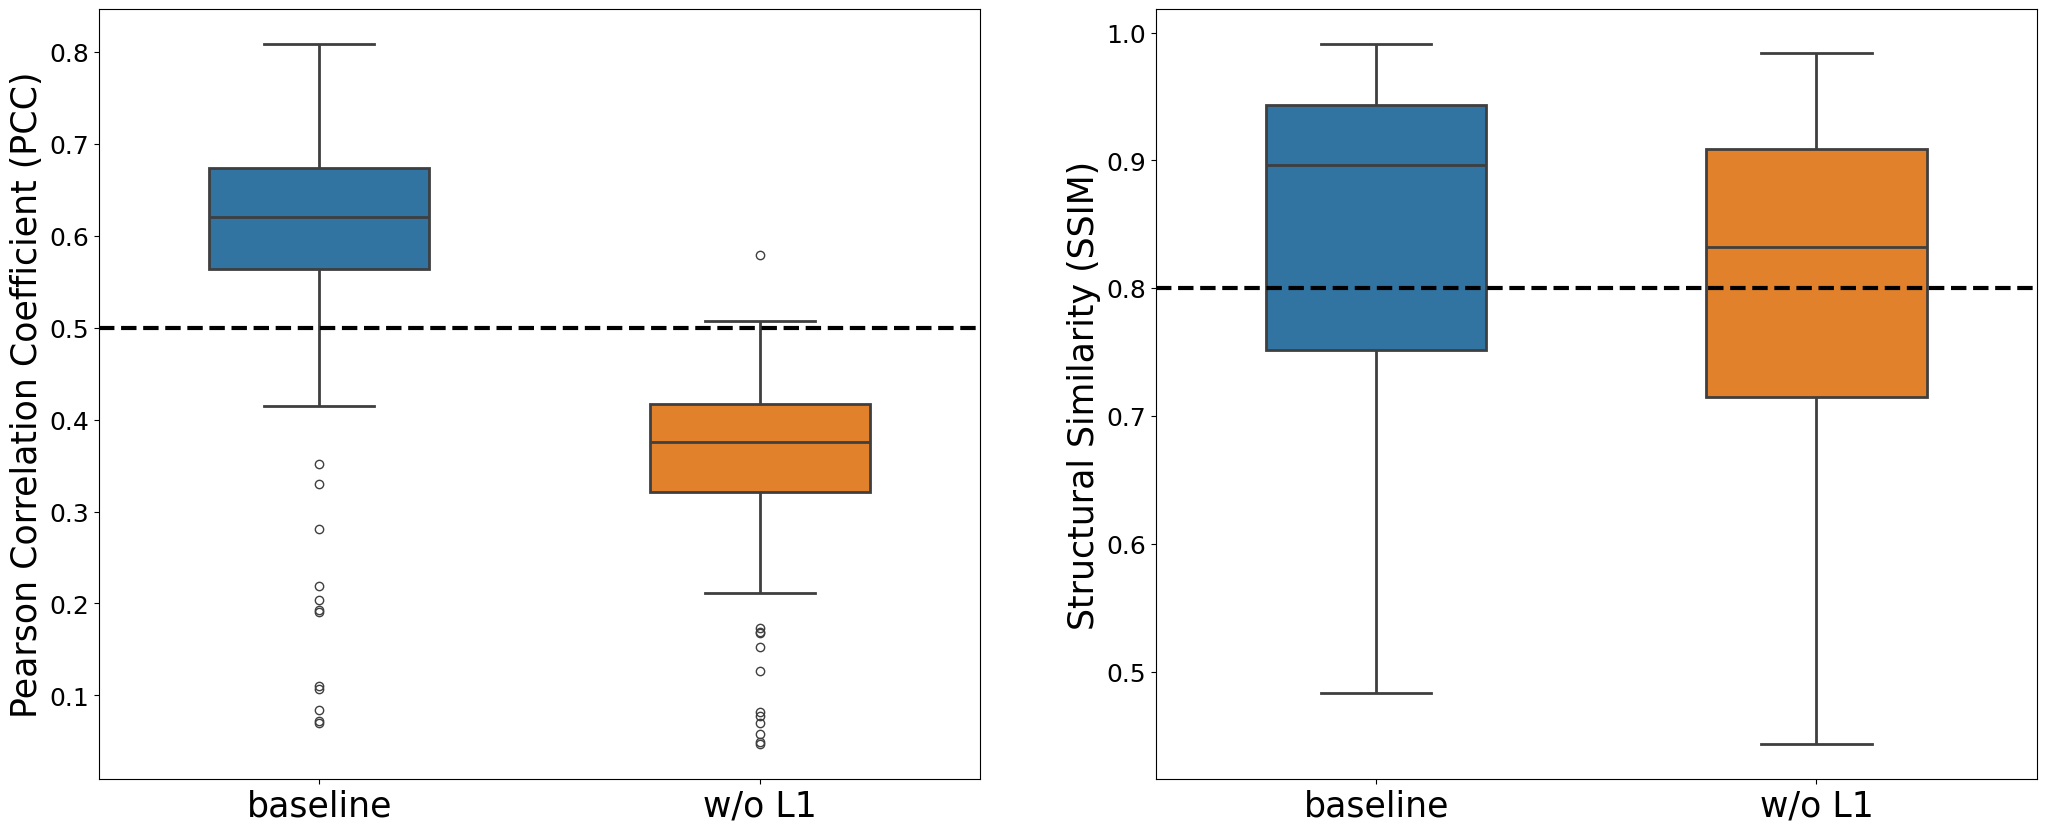

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pcc and df_ssim are your DataFrame variables for PCC and SSIM data respectively.

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Set font size
fontsize = 25  # Size for titles/labels/ticks

'''
PCC Box plot
'''
sns.boxplot(
    x='Method',
    y='Pearson Correlation',
    data=df_pcc,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0]
)

axs[0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0].set_xticklabels(['baseline', 'w/o L1'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0].set_xlabel('')  # No x-label
axs[0].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)
# plot y=0.5
axs[0].axhline(y=0.5, color='k', linestyle='--', linewidth=3)

'''
SSIM Box plot
'''
sns.boxplot(
    x='Method',
    y='SSIM',
    data=df_ssim,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1]
)

axs[1].tick_params(labelsize=18) # Change the font size of the ticks
axs[1].set_xticklabels(['baseline', 'w/o L1'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[1].set_xlabel('')  # No x-label
axs[1].set_ylabel('Structural Similarity (SSIM)', fontsize=fontsize)
# plot y=0.5
axs[1].axhline(y=0.8, color='k', linestyle='--', linewidth=3)


plt.show()


### MRC

In [12]:
import mrcfile
import numpy as np

In [13]:
mrc = mrcfile.open('./paper_benchmark/test_gan_data/eman_new/3iyj_e2pdb2mrc_resample.mrc', mode='r')

In [14]:
mrc.data.shape, mrc.data.max()

((272, 287, 285), 0.0)

In [15]:
mrc = mrcfile.open('./paper_benchmark/test_gan_data/eman_new/3iyj_e2pdb2mrc.mrc', mode='r')
mrc.data.shape, mrc.data.max()

((287, 287, 287), 0.0)

In [16]:
mrc_exp = mrcfile.open('./paper_benchmark/test_exp_data/emd_5376.map', mode='r')

In [18]:
mrc_exp.data.shape

(360, 720, 720)

In [17]:
np.sum(data[data>0])

0.0

In [12]:
mrct = mrcfile.open('./3j2w_test.mrc', mode='r')

In [14]:
mrct.data.shape

(648, 648, 648)

### CSV file

In [112]:
import pandas as pd
import numpy as np

df_csv = pd.read_csv('./paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_pdb2vol': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_pdb2vol': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})

In [113]:
df_csv

,PDBID,EMID,Resolution,Inference-Time (s),PCC_pdb2vol,PCC_molmap,PCC_gan,SSIM_pdb2vol,SSIM_molmap,SSIM_gan,...,Correlation_pdb2vol,Correlation_About_Mean_pdb2vol,Correlation_molmap,Correlation_About_Mean_molmap,Correlation_gan,Correlation_About_Mean_gan,Correlation_gan_ablation,Correlation_About_Mean_gan_ablation,Correlation_e2pdb2mrc,Correlation_About_Mean_e2pdb2mrc
0,2y9j,1874,6.4,26.645612,0.471873,0.440969,0.695105,0.847687,0.947584,0.959793,...,0.54870,0.176400,0.50630,0.167100,0.9563,0.308900,0.9624,0.168700,0.611100,0.189100
1,2yew,1886,6.0,36.853399,0.039384,0.042192,0.063647,0.602122,0.588207,0.599613,...,0.06451,0.009545,0.05904,0.009201,0.2211,0.009773,0.2232,0.007778,0.031780,0.012470
2,3ixv,5100,6.8,25.043803,0.243732,0.225463,0.352014,0.759728,0.897714,0.922067,...,0.40620,0.064170,0.37250,0.061570,0.7634,0.069720,0.7793,0.030550,0.453100,0.072140
3,3iyj,5155,4.2,23.097357,0.204067,0.213000,0.280468,0.739714,0.694357,0.860114,...,0.27570,0.060980,0.26380,0.064230,0.6905,0.038240,0.7052,0.022740,0.082200,0.008641
4,3izi,5245,6.7,22.304340,0.468393,0.435711,0.671844,0.830591,0.827539,0.864755,...,0.60200,0.048550,0.55920,0.040500,0.9661,0.100400,0.9773,-0.042470,0.651600,0.043920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7cgn,30358,4.3,17.859725,0.476498,0.442557,0.655749,0.615481,0.639102,0.652747,...,0.64860,0.306500,0.60080,0.284100,0.9615,0.461700,0.9537,0.222800,0.587500,0.395200
196,7jk2,22359,3.2,20.043203,0.641025,0.603043,0.802574,0.823977,0.841113,0.899083,...,0.71540,0.392500,0.67090,0.374200,0.9500,0.604700,0.9236,0.251200,0.248600,0.056850
197,7jpk,22414,3.0,20.828561,0.550422,0.536934,0.507662,0.794375,0.786178,0.742084,...,0.68950,0.604900,0.65650,0.580700,0.8758,0.605500,0.8289,0.406400,0.007696,-0.002855
198,7jw1,22513,4.2,54.282325,0.156170,0.163853,0.209073,0.863486,0.850811,0.854909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# calculation

column_names = ["PCC_pdb2vol", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_pdb2vol", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_pdb2vol", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_pdb2vol", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_csv[column_names].mean()
mean_values

PCC_pdb2vol                            0.411415
PCC_molmap                             0.392624
PCC_e2pdb2mrc                          0.246372
PCC_gan                                0.518949
PCC_gan_ablation                       0.315943
SSIM_pdb2vol                           0.757400
SSIM_molmap                            0.764084
SSIM_e2pdb2mrc                         0.840123
SSIM_gan                               0.831061
SSIM_gan_ablation                      0.804424
Correlation_pdb2vol                    0.525479
Correlation_molmap                     0.486503
Correlation_e2pdb2mrc                  0.213947
Correlation_gan                        0.825702
Correlation_gan_ablation               0.807102
Correlation_About_Mean_pdb2vol         0.331478
Correlation_About_Mean_molmap          0.311394
Correlation_About_Mean_e2pdb2mrc       0.092926
Correlation_About_Mean_gan             0.442467
Correlation_About_Mean_gan_ablation    0.248043
dtype: float64

In [116]:
median_values = df_csv[column_names].median()
median_values

PCC_pdb2vol                            0.468776
PCC_molmap                             0.439674
PCC_e2pdb2mrc                          0.235723
PCC_gan                                0.600161
PCC_gan_ablation                       0.354824
SSIM_pdb2vol                           0.769351
SSIM_molmap                            0.772759
SSIM_e2pdb2mrc                         0.892959
SSIM_gan                               0.867914
SSIM_gan_ablation                      0.838643
Correlation_pdb2vol                    0.583800
Correlation_molmap                     0.537500
Correlation_e2pdb2mrc                  0.146100
Correlation_gan                        0.927750
Correlation_gan_ablation               0.904750
Correlation_About_Mean_pdb2vol         0.342350
Correlation_About_Mean_molmap          0.322350
Correlation_About_Mean_e2pdb2mrc       0.038710
Correlation_About_Mean_gan             0.505200
Correlation_About_Mean_gan_ablation    0.247150
dtype: float64

#### Find NaN rows

In [117]:
# find where is NaN
nan_SSIM_e2pdb2mrc = np.where(df_csv['SSIM_e2pdb2mrc'].isna())[0]
nan_SSIM_e2pdb2mrc, nan_SSIM_e2pdb2mrc.shape

(array([  5,   6,   7,   9,  14,  16,  30,  32,  33,  38,  39,  42,  47,
         49,  51,  58,  65,  69,  70,  72,  73,  76,  81,  86,  87,  94,
         95,  99, 101, 104, 107, 109, 112, 116, 119, 125, 128, 130, 141,
        146, 147, 148, 154, 155, 158, 160, 161, 164, 165, 166, 169, 170,
        171, 172, 177, 178, 179, 180, 182, 184, 186, 187, 189, 191, 198]),
 (65,))

In [118]:
zero_SSIM_e2pdb2mrc = np.where(df_csv['Correlation_e2pdb2mrc']==0)[0]
zero_SSIM_e2pdb2mrc, zero_SSIM_e2pdb2mrc.shape


(array([  5,   6,   7,  14,  16,  26,  30,  32,  33,  39,  42,  47,  49,
         51,  58,  65,  69,  70,  72,  73,  76,  81,  86,  87,  94,  95,
         99, 101, 104, 107, 109, 112, 116, 119, 125, 128, 130, 141, 146,
        147, 148, 154, 155, 158, 160, 161, 164, 165, 166, 169, 170, 171,
        172, 174, 177, 178, 179, 180, 182, 184, 186, 187, 189, 191]),
 (64,))

In [119]:
nan_Correlation_pdb2vol = np.where(df_csv['Correlation_pdb2vol'].isna())[0]
nan_Correlation_pdb2vol

array([  9,  38,  68, 198])

In [120]:
row1 = np.union1d(nan_SSIM_e2pdb2mrc, zero_SSIM_e2pdb2mrc)
row1, row1.shape

(array([  5,   6,   7,   9,  14,  16,  26,  30,  32,  33,  38,  39,  42,
         47,  49,  51,  58,  65,  69,  70,  72,  73,  76,  81,  86,  87,
         94,  95,  99, 101, 104, 107, 109, 112, 116, 119, 125, 128, 130,
        141, 146, 147, 148, 154, 155, 158, 160, 161, 164, 165, 166, 169,
        170, 171, 172, 174, 177, 178, 179, 180, 182, 184, 186, 187, 189,
        191, 198]),
 (67,))

In [121]:
row2 = np.union1d(row1, nan_Correlation_pdb2vol)
row2, row2.shape

(array([  5,   6,   7,   9,  14,  16,  26,  30,  32,  33,  38,  39,  42,
         47,  49,  51,  58,  65,  68,  69,  70,  72,  73,  76,  81,  86,
         87,  94,  95,  99, 101, 104, 107, 109, 112, 116, 119, 125, 128,
        130, 141, 146, 147, 148, 154, 155, 158, 160, 161, 164, 165, 166,
        169, 170, 171, 172, 174, 177, 178, 179, 180, 182, 184, 186, 187,
        189, 191, 198]),
 (68,))

In [122]:
row3 = np.union1d(row2, [1,8])
row3, row3.shape

(array([  1,   5,   6,   7,   8,   9,  14,  16,  26,  30,  32,  33,  38,
         39,  42,  47,  49,  51,  58,  65,  68,  69,  70,  72,  73,  76,
         81,  86,  87,  94,  95,  99, 101, 104, 107, 109, 112, 116, 119,
        125, 128, 130, 141, 146, 147, 148, 154, 155, 158, 160, 161, 164,
        165, 166, 169, 170, 171, 172, 174, 177, 178, 179, 180, 182, 184,
        186, 187, 189, 191, 198]),
 (70,))

In [123]:
df_drop = df_csv.drop(row3)
df_drop

,PDBID,EMID,Resolution,Inference-Time (s),PCC_pdb2vol,PCC_molmap,PCC_gan,SSIM_pdb2vol,SSIM_molmap,SSIM_gan,...,Correlation_pdb2vol,Correlation_About_Mean_pdb2vol,Correlation_molmap,Correlation_About_Mean_molmap,Correlation_gan,Correlation_About_Mean_gan,Correlation_gan_ablation,Correlation_About_Mean_gan_ablation,Correlation_e2pdb2mrc,Correlation_About_Mean_e2pdb2mrc
0,2y9j,1874,6.4,26.645612,0.471873,0.440969,0.695105,0.847687,0.947584,0.959793,...,0.5487,0.17640,0.5063,0.16710,0.9563,0.30890,0.9624,0.168700,0.611100,0.189100
2,3ixv,5100,6.8,25.043803,0.243732,0.225463,0.352014,0.759728,0.897714,0.922067,...,0.4062,0.06417,0.3725,0.06157,0.7634,0.06972,0.7793,0.030550,0.453100,0.072140
3,3iyj,5155,4.2,23.097357,0.204067,0.213000,0.280468,0.739714,0.694357,0.860114,...,0.2757,0.06098,0.2638,0.06423,0.6905,0.03824,0.7052,0.022740,0.082200,0.008641
4,3izi,5245,6.7,22.304340,0.468393,0.435711,0.671844,0.830591,0.827539,0.864755,...,0.6020,0.04855,0.5592,0.04050,0.9661,0.10040,0.9773,-0.042470,0.651600,0.043920
10,3j9t,6284,6.9,28.570023,0.389378,0.389360,0.624895,0.722073,0.737263,0.744860,...,0.5327,0.16100,0.4794,0.14570,0.9527,0.23670,0.9589,-0.002461,0.517600,0.220900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7bto,30180,4.0,20.977712,0.518105,0.490225,0.578526,0.826925,0.721209,0.966014,...,0.5940,0.43100,0.5492,0.40320,0.9033,0.63470,0.8599,0.343500,0.631800,0.441600
195,7cgn,30358,4.3,17.859725,0.476498,0.442557,0.655749,0.615481,0.639102,0.652747,...,0.6486,0.30650,0.6008,0.28410,0.9615,0.46170,0.9537,0.222800,0.587500,0.395200
196,7jk2,22359,3.2,20.043203,0.641025,0.603043,0.802574,0.823977,0.841113,0.899083,...,0.7154,0.39250,0.6709,0.37420,0.9500,0.60470,0.9236,0.251200,0.248600,0.056850
197,7jpk,22414,3.0,20.828561,0.550422,0.536934,0.507662,0.794375,0.786178,0.742084,...,0.6895,0.60490,0.6565,0.58070,0.8758,0.60550,0.8289,0.406400,0.007696,-0.002855


In [126]:
# calculate new mean and median for dropped data

column_names = ["PCC_pdb2vol", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_pdb2vol", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_pdb2vol", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_pdb2vol", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_drop[column_names].mean()
mean_values


PCC_pdb2vol                            0.474981
PCC_molmap                             0.451634
PCC_e2pdb2mrc                          0.251366
PCC_gan                                0.593518
PCC_gan_ablation                       0.358993
SSIM_pdb2vol                           0.763722
SSIM_molmap                            0.770562
SSIM_e2pdb2mrc                         0.842193
SSIM_gan                               0.841425
SSIM_gan_ablation                      0.804773
Correlation_pdb2vol                    0.602839
Correlation_molmap                     0.559329
Correlation_e2pdb2mrc                  0.322015
Correlation_gan                        0.906103
Correlation_gan_ablation               0.888365
Correlation_About_Mean_pdb2vol         0.335154
Correlation_About_Mean_molmap          0.315002
Correlation_About_Mean_e2pdb2mrc       0.139912
Correlation_About_Mean_gan             0.466224
Correlation_About_Mean_gan_ablation    0.238055
dtype: float64

In [127]:
median_values = df_drop[column_names].median()
median_values

PCC_pdb2vol                            0.499314
PCC_molmap                             0.469947
PCC_e2pdb2mrc                          0.237045
PCC_gan                                0.620774
PCC_gan_ablation                       0.375204
SSIM_pdb2vol                           0.771263
SSIM_molmap                            0.774014
SSIM_e2pdb2mrc                         0.894916
SSIM_gan                               0.896296
SSIM_gan_ablation                      0.832575
Correlation_pdb2vol                    0.619900
Correlation_molmap                     0.573450
Correlation_e2pdb2mrc                  0.311700
Correlation_gan                        0.943200
Correlation_gan_ablation               0.923650
Correlation_About_Mean_pdb2vol         0.333900
Correlation_About_Mean_molmap          0.310550
Correlation_About_Mean_e2pdb2mrc       0.124700
Correlation_About_Mean_gan             0.502400
Correlation_About_Mean_gan_ablation    0.232350
dtype: float64

In [129]:
# # save the new csv

# column_order = ["PDBID", "EMID", "Resolution", "Inference-Time (s)", 
#                 "PCC_pdb2vol", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
#                 "SSIM_pdb2vol", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
#                 "Correlation_pdb2vol", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
#                 "Correlation_About_Mean_pdb2vol", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]
    
# df_drop = df_drop[column_order]
# df_drop.to_csv('./paper_benchmark/inference_data_new.csv', index=False)

In [130]:
df_csv = pd.read_csv('./paper_benchmark/inference_data_new.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_pdb2vol': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_pdb2vol': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})

# calculation

column_names = ["PCC_pdb2vol", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_pdb2vol", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_pdb2vol", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_pdb2vol", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_csv[column_names].mean()
mean_values



PCC_pdb2vol                            0.474981
PCC_molmap                             0.451634
PCC_e2pdb2mrc                          0.251366
PCC_gan                                0.593518
PCC_gan_ablation                       0.358993
SSIM_pdb2vol                           0.763722
SSIM_molmap                            0.770562
SSIM_e2pdb2mrc                         0.842193
SSIM_gan                               0.841425
SSIM_gan_ablation                      0.804773
Correlation_pdb2vol                    0.602839
Correlation_molmap                     0.559329
Correlation_e2pdb2mrc                  0.322015
Correlation_gan                        0.906103
Correlation_gan_ablation               0.888365
Correlation_About_Mean_pdb2vol         0.335154
Correlation_About_Mean_molmap          0.315002
Correlation_About_Mean_e2pdb2mrc       0.139912
Correlation_About_Mean_gan             0.466224
Correlation_About_Mean_gan_ablation    0.238055
dtype: float64

### Move files

In [54]:
df_csv = pd.read_csv('./paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_pdb2vol': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_pdb2vol': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})
pdbs = df_csv['PDBID']
emdbs = df_csv['EMID']
pdbs, emdbs

(0      2y9j
 1      3ixv
 2      3iyj
 3      3izi
 4      3j9t
        ... 
 125    7bto
 126    7cgn
 127    7jk2
 128    7jpk
 129    7kdt
 Name: PDBID, Length: 130, dtype: object,
 0       1874
 1       5100
 2       5155
 3       5245
 4       6284
        ...  
 125    30180
 126    30358
 127    22359
 128    22414
 129    22829
 Name: EMID, Length: 130, dtype: object)

In [ ]:
source_dir = './paper_benchmark/test_exp_data/'
new_dir = './paper_benchmark/new_dir/raw_map_pdb'

# move file to other dir
import shutil
import os

for pdb in pdbs:
    src = os.path.join(source_dir, f'{pdb}_ref.pdb')
    dst = os.path.join(new_dir, f'{pdb}_ref.pdb')
    shutil.move(src, dst)
    print(f'{pdb} moved')
    
    
    # rmdst1 = f'./paper_benchmark/test_gan_data/{pdb}_24-0517-132907-last_molmap_gan.mrc'
    # rmdst2 = f'./paper_benchmark/test_gan_data/{pdb}_24-0517-132907-last_molmap_gan_resample.mrc'
    # os.remove(rmdst1)
    # os.remove(rmdst2)
    
    
    